# 生物医学统计概论  单元3 @林关宁

## 单样本的均值CI -> 估算总体均值 µ

If sample data is normal or normal-like distributed, we almost always assume t-distribution to compute confidence interval, as explained below. Then, the confidence interval of mean has the following analytical solution:
如果样本数据是正态分布或类正态分布，我们几乎总是假设t分布来计算置信区间，如下所述。然后，均值的置信区间具有以下解析解：

$$ \text{C.I.}_{\text{mean}}: \quad \mu \pm (t_{1-\frac{\alpha}{2},df} \times \frac{s}{\sqrt{n}})$$

where

$\mu$: sample mean

$\alpha$: significance level

$n$: number of samples

$df$: degrees of freedom. In this example, df = $n$ - 1

$s$: sample standard deviation
$t$: t-score. depends on $\alpha$ and $df$

### Notes: z-score vs t-score
You've probably seen mixed use of z-score and t-score for confidence interval during your studies. Long story short, it is safe and almost always better to use t-score than z-score.
在你的研究中，你可能已经看到了z分数和t分数对置信区间的混合使用。长话短说，使用t-score比使用z-score更安全，而且几乎总是更好。

Z-score ($z_{\frac{\alpha}{2}}$) is used for normal distribution, and t-score ($t_{\frac{\alpha}{2},df}$) is used for t-distribution. You use z-score if you know the population variance $\sigma^2$. If not, you use t-score. Since the population variance $\sigma^2$ is almost never known, you almost always use t-score for confidence interval. After all, the purpose of using confidence interval is to mitigate the issue of Population vs. Samples when estimating population parameter ($\sigma^2$) from samples. If you know the population parameters, you probably don't need confidence interval in the first place.
Z分数（$Z{\frac{\alpha}{2}}$）用于正态分布，t分数（$t{\frac{\alpha}{2}，df}$）用于t分布。如果知道总体方差$\sigma^2$，则使用z分数。如果不是，则使用t-score。由于总体方差$\sigma^2$几乎是未知的，所以您几乎总是使用t分数作为置信区间。毕竟，在从样本中估计总体参数（$\sigma^2$）时，使用置信区间的目的是缓解总体与样本之间的问题。如果你知道总体参数，你可能一开始就不需要置信区间。

A natural question is, "how is it safe to use t-score instead of z-score? Shouldn't I be using z-score since I know that the population is normally distributed, from previous knowledge?" It is safe to do so because t-distribution converges to normal distribution according to the Centeral Limit Theorem. Recall that t-distribution behaves more and more like a normal distribution as the sample size increases.
一个自然的问题是，“使用t-score而不是z-score如何安全？我不应该使用z-score吗？因为我从以前的知识中知道人口是正态分布的？”这样做是安全的，因为根据中心极限定理，t分布收敛于正态分布。回想一下，随着样本量的增加，t分布的行为越来越像正态分布。

Search for "95% confidence z-score" and you will see $z$ = 1.96 at 95% confidence level. On the other hand, t-score approaches 1.96 as its degrees of freedom increases: $\lim_{df \to \infty}t$ = 1.96. For 95% confidence level, $t$ = 2.228 when $n$ - 1 = 10 and $t$ = 2.086 when $n$ - 1 = 20. This is why it is safe to always replace z-score with t-score when computing confidence interval.
搜索“95%置信度z-score”，您将在95%置信水平下看到$z$=1.96。另一方面，随着自由度的增加，t分数接近1.96:$\lim_{df\to\infty}t$=1.96。对于95%的置信水平，$n$-1=10时，$t$=2.228，$n$-1=20时，$t$=2.086。这就是为什么在计算置信区间时，总是用t分数代替z分数是安全的。

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats

#读取数据
df = pd.read_excel("Data_normtemp.xlsx")
df.head()

alpha = 0.05                       # significance level = 5%
data = df.体温
size = len(data)                   

# 一个正态总体方差已知，均值的区间估计，使用的是正态分布：
conf_intveral_z = stats.norm.interval(1-alpha, loc=np.mean(data), scale=stats.sem(data))
print(conf_intveral_z)

##########################
print("###########")

# 一个正态总体，方差未知，均值的区间估计，使用的是 t 分布：
t = stats.t.ppf(1 - alpha/2, size-1)   # t-critical value for 95% CI = 2.093
s = np.std(data, ddof=1)               # sample standard deviation = 2.502
lower = np.mean(data) - (t * s / np.sqrt(size))
upper = np.mean(data) + (t * s / np.sqrt(size))
print(lower, upper)

conf_intveral_t = stats.t.interval(1-alpha, size-1 , loc=np.mean(data), scale=stats.sem(data))
print(conf_intveral_t)

(98.12319642818164, 98.37526511027988)
###########
98.12200290560803 98.3764586328535
(98.12200290560803, 98.3764586328535)


***
### Bootstrapping 自助方法

Bootstrapping is a statistical method for estimating the sampling distribution of a statistic by sampling with replacement from the original sample, most often with the purpose of estimating confidence intervals of a population parameter like a mean, median, proportion, correlation coefficient or regression coefficient.

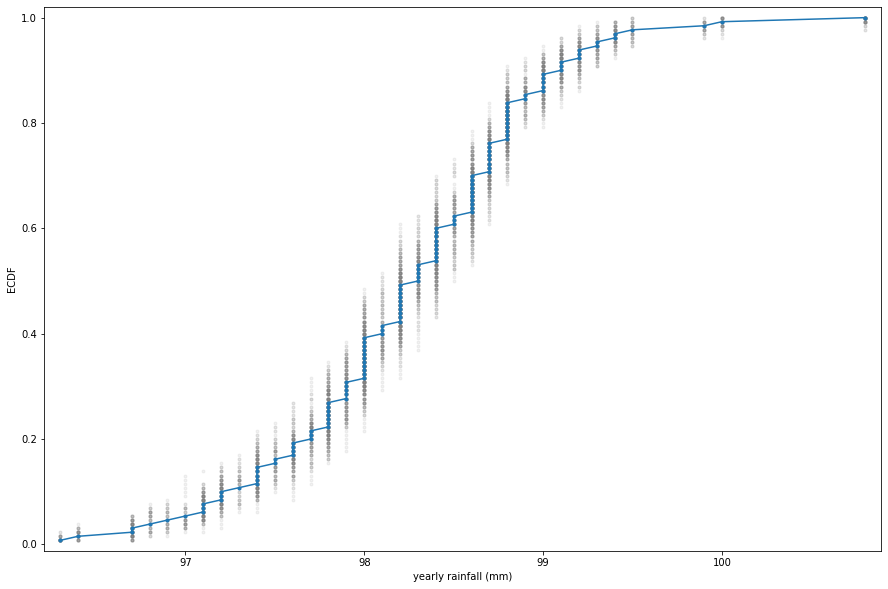

In [2]:
import matplotlib.pyplot as plt

# 经验累积分布函数
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

_ = plt.figure(figsize=(15,10))

for i in range(50):#做50次实验
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(data, size=len(data))#每次有放回地抽取一个和rainfall一样长的样本bs_sample
 
    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)#为bs_sample生成一个CDF（累计密度函数），返回x值是降雨量，y值是小于这个x值的概率

    _ = plt.plot(x, y, marker='.', linestyle='none',
                 c='gray', alpha=0.1)#将这次循环中的bs_sample(i)画在图上
 
# Compute and plot ECDF from original data
x, y = ecdf(data)#为真实值生成一个CDF

_ = plt.plot(x, y, marker='.')#也画在图上


# Make margins and label axes
plt.margins(0.02)

_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

In [3]:

def bootstrap_replicate_1d(data,func):
    bs_sample=np.random.choice(data,len(data))
    return func(bs_sample)
#产生一次bootstrap sample，并对这个sample进行一次func操作


In [4]:

def draw_bs_reps(data,func,size=1):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func)
    return bs_replicates
#重复size次bootstrap_replicate_1d


### 可以看出真实值的离散程度和做10000次实验得出的平均值的离散程度是非常接近的

而且当做100000次实验的时候，两者的离散程度就愈发接近了。

0.06405661469519337
0.06359556324403012


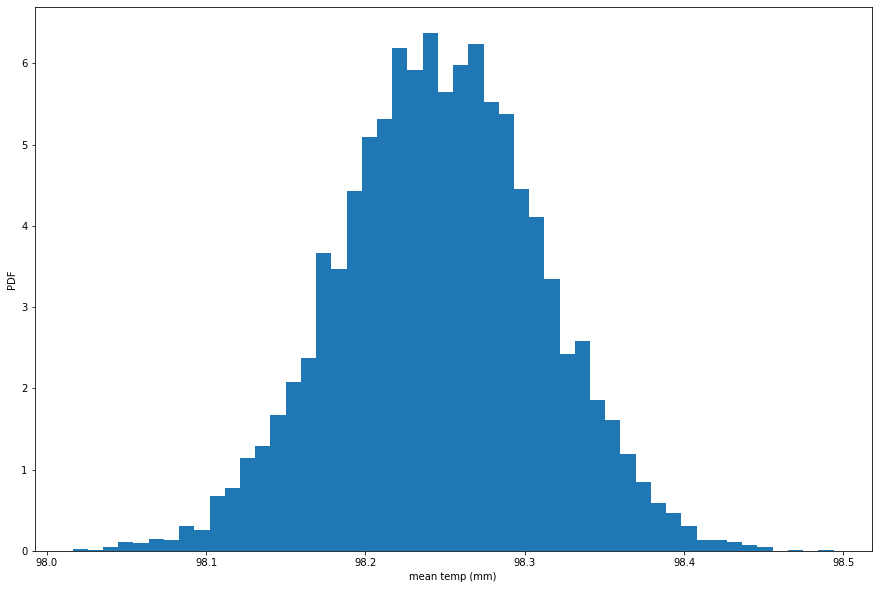

In [5]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(data,np.mean,size=10000)#将rainfall做bootstrap sample，并将结果均值，重复10000次
 
# Compute and print SEM
sem = np.std(data) / np.sqrt(len(data))#求出rainfall真实值的标准差
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)#输出10000次平均值的标准差
print(bs_std)
 
# Make a histogram of the results
_ = plt.figure(figsize=(15,10))
_ = plt.hist(bs_replicates, bins=50, density=True)#做10000次实验的概率直方图
_ = plt.xlabel('mean temp (mm)')
_ = plt.ylabel('PDF')
 
# Show the plot
plt.show()

### 这能说明什么呢？

当我们做一个统计计算时，经常会发现无法收集到全部的样本数据，出于这种无奈，我们只好退而求其次地相信选取其中的某一段数据，经过反复的bootstrap replicate（相当于无限重复抽样的次数，以弥补我们在客观现实世界中无法发无限次重复实验的遗憾），得到一系列的样本，从中认为这就是最接近客观世界的样本。

### 可以用函数包来执行

In [6]:
# install bootstrapped package "pip install bootstrapped"

import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

mean = 100
stdev = 10

population = np.random.normal(loc=mean, scale=stdev, size=50000)

# take 1k 'samples' from the larger population
samples = population[:1000]

print(bs.bootstrap(samples, stat_func=bs_stats.mean))

print(bs.bootstrap(samples, stat_func=bs_stats.std))


99.64708955138356    (99.03406578127549, 100.25080723864721)
9.772487481555286    (9.345262944523792, 10.21082954255126)
